In [ ]:
# Ссылка на соревнование https://www.kaggle.com/kartik2112/fraud-detection

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandasql as ps
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Выполним загрузку обучающей выборки

In [13]:
train = pd.read_csv('fraudTrain.csv')

In [14]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], dtype='object')

In [15]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [16]:
train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [17]:
train.shape

(1296675, 23)

Выполним оценку баланса классов

In [18]:
train.groupby('is_fraud').count()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,,
0,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169,1289169
1,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506,7506


In [433]:
train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [11]:
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [22]:
transaction_dynamycs = ps.sqldf(''' select substr(trans_date_trans_time,1,7) year_month, count(*) transactions_num,  count(case when is_fraud = 1 then 1 end) fraud_transactions_num,
round(100 * cast(count(case when is_fraud = 1 then 1 end) as float) / cast(count(*) as float),5) fraud_share 
from train
group by substr(trans_date_trans_time,1,7)
order by 1
''', locals())

In [21]:
transaction_dynamycs

,"substr(trans_date_trans_time,1,7)",count(*),count(case when is_fraud = 1 then 1 end),fraud_share
0,2019-01,52525,506,0.96335
1,2019-02,49866,517,1.03678
2,2019-03,70939,494,0.69637
3,2019-04,68078,376,0.55231
4,2019-05,72532,408,0.56251
5,2019-06,86064,354,0.41132
6,2019-07,86596,331,0.38223
7,2019-08,87359,382,0.43728
8,2019-09,70652,418,0.59163
9,2019-10,68758,454,0.66029


In [ ]:
list(transaction_dynamycs.transaction_dynamycs)

In [ ]:
ps.sqldf(''' select merchant, 
count(case when is_fraud = 1 then 1 end) fraud_cnt, 
count(case when is_fraud = 0 then 1 end) none_fraud_cnt, 
count(*)
from train
group by merchant
order by 2 desc
''', locals())

In [412]:
sample_none_fraud = train.loc[train.is_fraud == 0,:].sample(n=1000000, random_state=123)

In [413]:
sample_fraud = train.loc[train.is_fraud == 1,:].sample(n=7500, random_state=123)

In [414]:
train = sample_none_fraud.append(sample_fraud)

In [428]:
train.shape

(1007500, 23)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [416]:
#X = train.loc[:,['category','amt','gender','state','zip','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']]
X = train.loc[:,['category','amt','gender','state','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']]
y = train.loc[:,'is_fraud']

In [417]:
def describe_df(df):
    for i in range(X.shape[1]):
        print('''
              Col. №''' + str(i) + '. Name:' + X.columns[i])
        print(X.dtypes[i])
        if X.dtypes[i] == 'O':
            print(X.iloc[:,i].unique())
        print(X.iloc[:,i].describe)

In [418]:
X.dob = pd.to_datetime(X.dob)
X['dob'] = X.dob.astype('int64') // 10**9

In [419]:
def one_hot_encode(df, col_name):
    for i in list(col_name):
        one_hot = pd.get_dummies(df[i])
        one_hot.columns = i + '_' + one_hot.columns
        df = df.drop(i, axis = 1)
        df = df.join(one_hot)
    return df

In [420]:
X = one_hot_encode(X, ['category','gender', 'state'])

In [421]:
X

,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,category_entertainment,category_food_dining,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
523376,2.45,43.0172,-111.0292,471,-76291200,1344867209,42.751776,-110.913721,0,1,...,0,0,0,0,0,0,0,0,0,1
564770,37.78,38.9999,-109.6150,46,546134400,1346164420,39.998223,-110.298415,1,0,...,0,0,0,1,0,0,0,0,0,0
763939,66.17,40.1362,-95.2138,1631,-534816000,1353680083,39.997880,-95.182583,0,0,...,0,0,0,0,0,0,0,0,0,0
459770,175.78,48.4786,-122.3345,14871,132105600,1342936815,47.987848,-121.717211,0,0,...,0,0,0,0,0,0,1,0,0,0
1125900,42.95,40.3673,-79.1605,1770,786844800,1365879814,40.544096,-79.153503,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286909,374.51,32.9413,-81.1807,1725,155433600,1371439533,32.228796,-82.076297,0,0,...,0,0,0,0,0,0,0,0,0,0
191395,884.05,42.4999,-74.6117,1666,-47433600,1333907868,41.697838,-73.715083,0,0,...,0,0,0,0,0,0,0,0,0,0
929116,832.04,29.5894,-98.5201,1595797,188956800,1357269814,30.000882,-98.160660,0,0,...,0,0,1,0,0,0,0,0,0,0
1071009,14.52,40.8555,-79.7372,2054,-202348800,1363827007,41.372705,-79.720494,0,0,...,0,0,0,0,0,0,0,0,0,0


In [422]:
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [423]:
# standardize the data attributes
standardized_X = preprocessing.scale(X)

C:\Users\dsele\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [424]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [425]:
model.fit(standardized_X, y)

C:\Users\dsele\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [426]:
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.87      0.92   1000000
           1       0.01      0.18      0.02      7500

    accuracy                           0.86   1007500
   macro avg       0.50      0.52      0.47   1007500
weighted avg       0.99      0.86      0.92   1007500

[[865027 134973]
 [  6159   1341]]


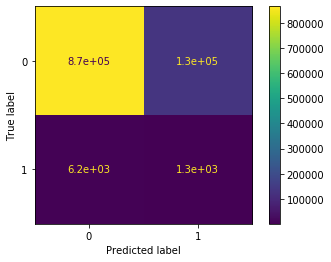

In [427]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X, y)

In [376]:
test = pd.read_csv('fraudTest.csv')

In [383]:
#X = train.loc[:,['category','amt','gender','state','zip','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']]
X_test = test.loc[:,['category','amt','gender','lat','long','city_pop','dob','unix_time','merch_lat','merch_long']]
y_test = test.loc[:,'is_fraud']

In [384]:
X_test.dob = pd.to_datetime(X_test.dob)
X_test['dob'] = X_test.dob.astype('int64') // 10**9

In [385]:
X_test = one_hot_encode(X_test, ['category','gender'])

In [386]:
X_test.dtypes

amt                        float64
lat                        float64
long                       float64
city_pop                     int64
dob                          int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
category_entertainment       uint8
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
gender_F                     uint8
gender_M                     uint8
dtype: object

In [387]:
standardized_X = preprocessing.scale(X)

C:\Users\dsele\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [388]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
#model = DecisionTreeClassifier()
#model.fit(X, y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.00      0.16      0.01      2145

    accuracy                           0.87    555719
   macro avg       0.50      0.52      0.47    555719
weighted avg       0.99      0.87      0.93    555719

[[482522  71052]
 [  1797    348]]


In [390]:
print(metrics.confusion_matrix(expected, predicted))

[[482522  71052]
 [  1797    348]]


In [391]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [392]:
test.groupby('is_fraud').count()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,553574,553574,553574,553574,553574,553574,553574,553574,553574,553574,...,553574,553574,553574,553574,553574,553574,553574,553574,553574,553574
1,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,...,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145


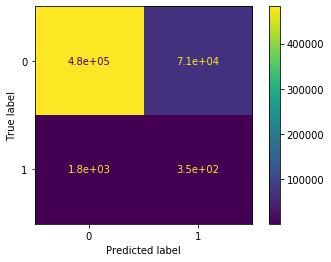

In [395]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)